In [2]:
# If you're using Google Colab or another environment, ensure you have access to your drive
from google.colab import drive
drive.mount('/content/drive')

# !pip install codecarbon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from codecarbon import EmissionsTracker  # Import CodeCarbon

# Replace 'n' with the appropriate index or identifier for your dataset
n = 'your_dataset_identifier'  # e.g., '1', '2', etc.

# Load the dataset
X = np.load(f'/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-{24}-X.npy')
y = np.load(f'/content/drive/MyDrive/Kryptonite-N/Datasets/kryptonite-{24}-y.npy')

# Convert to DataFrame for easier manipulation
feature_names = [f'feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['label'] = y

# # Display basic information
# print("Dataset Information:")
# print(df.info())
# print("\nStatistical Summary:")
# print(df.describe())
# print("\nClass Distribution:")
# print(df['label'].value_counts())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install codecarbon

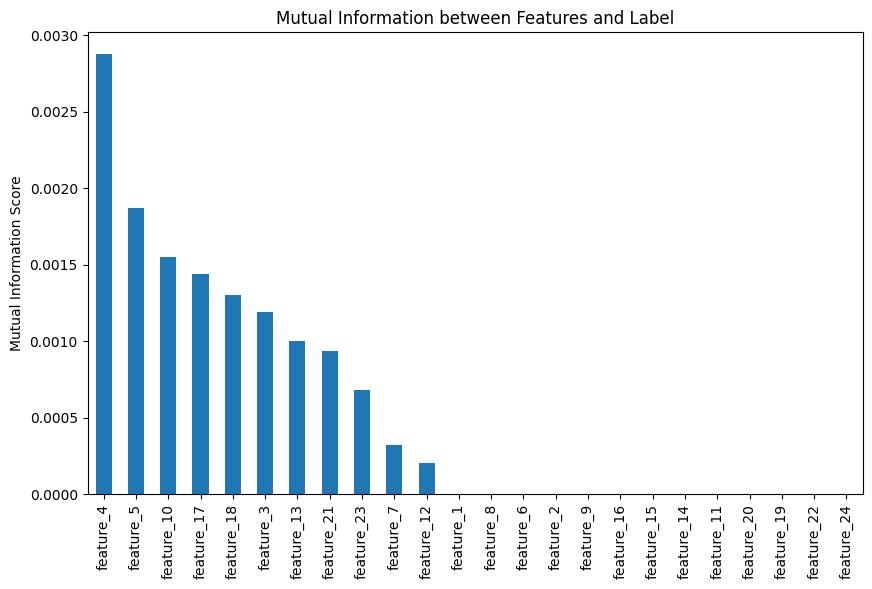

In [3]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame with features and 'label'

# Calculate mutual information between each feature and the label
mi = mutual_info_classif(df.drop('label', axis=1), df['label'], discrete_features=False)

# Create a Series for better visualization
mi_series = pd.Series(mi, index=df.drop('label', axis=1).columns)
mi_series = mi_series.sort_values(ascending=False)

# Plot mutual information
plt.figure(figsize=(10, 6))
mi_series.plot(kind='bar')
plt.title('Mutual Information between Features and Label')
plt.ylabel('Mutual Information Score')
plt.show()


In [4]:
# # !pip install codecarbon

# tracker = EmissionsTracker(
#     project_name="DeepResNet-Training",  # Optional: Name your project
#     output_dir="./carbon_tracker_logs"    # Optional: Directory to save logs
# )

# # Start tracking emissions
# tracker.start()


In [5]:
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import KBinsDiscretizer
# from torch.utils.data import DataLoader, TensorDataset
# import os

# # Check if GPU is available
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Define Xavier initialization function
# def init_weights_xavier(m):
#     if isinstance(m, nn.Linear):
#         nn.init.xavier_uniform_(m.weight)
#         if m.bias is not None:
#             nn.init.zeros_(m.bias)  # Initialize biases to zero for consistency

# # Define a single ResNet Block with Batch Normalization and Dropout
# class ResNetBlock(nn.Module):
#     def __init__(self, size):
#         super(ResNetBlock, self).__init__()
#         self.fc1 = nn.Linear(size, size)
#         self.bn1 = nn.BatchNorm1d(size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(size, size)
#         self.bn2 = nn.BatchNorm1d(size)

#     def forward(self, x):
#         residual = x
#         out = self.relu(self.bn1(self.fc1(x)))
#         out = self.bn2(self.fc2(out))
#         out += residual
#         out = self.relu(out)
#         return out


# # Define the complete ResNet architecture with deeper layers and doubled size
# class DeepResNet(nn.Module):
#     def __init__(self, input_size):
#         super(DeepResNet, self).__init__()
#         self.fc_initial = nn.Linear(input_size, 512)
#         self.block1 = ResNetBlock(512)
#         self.block2 = ResNetBlock(512)
#         self.block3 = ResNetBlock(512)  # Additional ResNet block
#         self.block4 = ResNetBlock(512)  # Additional ResNet block
#         self.fc_final = nn.Linear(512, 1)
#         self.relu = nn.ReLU()
#         self.dropout = nn.Dropout(0.5)  # Dropout with 50% rate for the final layer

#     def forward(self, x):
#         x = self.relu(self.fc_initial(x))
#         x = self.block1(x)
#         x = self.block2(x)
#         x = self.block3(x)
#         x = self.block4(x)
#         x = self.dropout(x)
#         x = torch.sigmoid(self.fc_final(x))
#         return x

# # Discretize features function
# def discretize_data(X, strategy='uniform', n_bins=10):
#     discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
#     X_discretized = discretizer.fit_transform(X)
#     return X_discretized

# # Load and preprocess the data with optional discretization
# def load_data(n, discretize=False, n_bins=10, strategy='uniform'):
#     base_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/'
#     X = np.load(os.path.join(base_path, f'kryptonite-{n}-X.npy'))
#     y = np.load(os.path.join(base_path, f'kryptonite-{n}-y.npy'))

#     # If n=24, attempt to load additional data
#     if n == 24:
#         additional_X_path = os.path.join(base_path, f'additional-kryptonite-{n}-X.npy')
#         additional_y_path = os.path.join(base_path, f'additional-kryptonite-{n}-y.npy')
#         if os.path.exists(additional_X_path) and os.path.exists(additional_y_path):
#             additional_X = np.load(additional_X_path)
#             additional_y = np.load(additional_y_path)
#             X = np.vstack((X, additional_X))
#             y = np.concatenate((y, additional_y))
#             print(f"Loaded additional data for n={n}: {additional_X.shape[0]} samples")
#         else:
#             print(f"No additional data found for n={n}. Proceeding with original dataset.")

#     # Split into train, validation, and test sets
#     X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)
#     X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#     # Standardize the data
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_val = scaler.transform(X_val)
#     X_test = scaler.transform(X_test)

#     # Optionally discretize the data
#     if discretize:
#         X_train = discretize_data(X_train, strategy=strategy, n_bins=n_bins)
#         X_val = discretize_data(X_val, strategy=strategy, n_bins=n_bins)
#         X_test = discretize_data(X_test, strategy=strategy, n_bins=n_bins)

#     return X_train, X_val, X_test, y_train, y_val, y_test

# # Set batch size
# batch_size = 1024  # Adjust as needed

# # Train the DeepResNet model with mini-batch gradient descent and early stopping
# def train_model(X_train, y_train, X_val, y_val, input_size, num_epochs=500, learning_rate=0.001, patience=10):
#     # Convert data to PyTorch tensors and create DataLoader for mini-batches
#     X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
#     y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
#     train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

#     X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
#     y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)

#     # Initialize model, apply Xavier initialization, loss function, and optimizer
#     model = DeepResNet(input_size).to(device)
#     model.apply(init_weights_xavier)

#     criterion = nn.BCELoss()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

#     # Track losses and accuracies for plotting
#     train_losses = []
#     val_losses = []
#     val_accuracies = []
#     best_val_loss = float('inf')
#     patience_counter = 0

#     # Training loop with early stopping
#     for epoch in range(num_epochs):
#         model.train()
#         epoch_train_loss = 0  # To accumulate the training loss over all batches

#         # Loop over mini-batches
#         for X_batch, y_batch in train_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             optimizer.zero_grad()
#             output = model(X_batch)
#             train_loss = criterion(output, y_batch)
#             train_loss.backward()
#             optimizer.step()
#             epoch_train_loss += train_loss.item()  # Accumulate training loss

#         # Average training loss over all batches for the epoch
#         train_losses.append(epoch_train_loss / len(train_loader))

#         # Validation loss and accuracy
#         model.eval()
#         with torch.no_grad():
#             val_output = model(X_val_tensor)
#             val_loss = criterion(val_output, y_val_tensor)
#             val_pred = (val_output > 0.5).float()
#             val_accuracy = accuracy_score(y_val_tensor.cpu().numpy(), val_pred.cpu().numpy())

#             # Record validation loss and accuracy
#             val_losses.append(val_loss.item())
#             val_accuracies.append(val_accuracy)

#         # Print progress every 10 epochs
#         if (epoch + 1) % 10 == 0 or epoch == 0:
#             print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, '
#                   f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')

#     return model, train_losses, val_losses, val_accuracies

# # Evaluate the model on the test set
# def evaluate_model(model, X_test, y_test):
#     X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
#     y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)
#     model.eval()
#     with torch.no_grad():
#         test_output = model(X_test_tensor)
#         test_pred = (test_output > 0.5).float()
#         test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
#     print(f'Test Accuracy: {test_accuracy:.4f}')
#     return test_accuracy

# # Plot losses and accuracies
# def plot_metrics(train_losses, val_losses, val_accuracies, dataset_name):
#     epochs_train = range(1, len(train_losses) + 1)
#     epochs_val = range(1, len(val_losses) + 1)
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#     # Plot training and validation losses
#     ax1.plot(epochs_train, train_losses, label="Train Loss")
#     ax1.plot(epochs_val, val_losses, label="Validation Loss")
#     ax1.set_xlabel("Epochs")
#     ax1.set_ylabel("Loss")
#     ax1.set_title(f"{dataset_name} Loss over Epochs")
#     ax1.legend()

#     # Use the same length adjustment for validation accuracy if needed
#     epochs_val_acc = range(1, len(val_accuracies) + 1)
#     ax2.plot(epochs_val_acc, val_accuracies, label="Validation Accuracy", color='green')
#     ax2.set_xlabel("Epochs")
#     ax2.set_ylabel("Accuracy")
#     ax2.set_title(f"{dataset_name} Validation Accuracy over Epochs")
#     ax2.legend()

#     plt.tight_layout()
#     plt.show()

# # Main script
# possible_n_vals = [18]  # Adjust based on dataset availability

# for n in possible_n_vals:
#     print(f"\nDataset kryptonite-{n}")

#     # Test performance with and without discretization
#     for discretize in [False, True]:
#         print(f"\nDiscretization: {'Enabled' if discretize else 'Disabled'}")
#         X_train, X_val, X_test, y_train, y_val, y_test = load_data(
#             n,
#             discretize=discretize,
#             n_bins=10,
#             strategy='quantile' if discretize else 'uniform'
#         )
#         input_size = X_train.shape[1]

#         # Train and evaluate the model
#         model, train_losses, val_losses, val_accuracies = train_model(
#             X_train, y_train, X_val, y_val, input_size
#         )
#         test_accuracy = evaluate_model(model, X_test, y_test)

#         # Plot metrics
#         plot_metrics(
#             train_losses,
#             val_losses,
#             val_accuracies,
#             f"Dataset kryptonite-{n} (Discretization: {'Enabled' if discretize else 'Disabled'})"
#         )


In [5]:
import os

# Define the output directory
output_dir = "./carbon_tracker_logs"

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

print(f"Directory '{output_dir}' is ready.")


Directory './carbon_tracker_logs' is ready.


[codecarbon INFO @ 10:28:01] [setup] RAM Tracking...
[codecarbon INFO @ 10:28:01] [setup] GPU Tracking...
[codecarbon INFO @ 10:28:01] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 10:28:01] [setup] CPU Tracking...
[codecarbon WARNING @ 10:28:01] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Using device: cuda
Directory './carbon_tracker_logs' is ready for CodeCarbon logs.


[codecarbon WARNING @ 10:28:02] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:28:02] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:28:02] >>> Tracker's metadata:
[codecarbon INFO @ 10:28:02]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 10:28:02]   Python version: 3.10.12
[codecarbon INFO @ 10:28:02]   CodeCarbon version: 2.7.4
[codecarbon INFO @ 10:28:02]   Available RAM : 83.477 GB
[codecarbon INFO @ 10:28:02]   CPU count: 12
[codecarbon INFO @ 10:28:02]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:28:02]   GPU count: 1
[codecarbon INFO @ 10:28:02]   GPU model: 1 x NVIDIA A100-SXM4-40GB
[codecarbon INFO @ 10:28:02] Saving emissions data to file /content/carbon_tracker_logs/emissions.csv



Dataset kryptonite-18

Discretization: Disabled
Epoch [1/500], Train Loss: 1.2829, Val Loss: 0.8294, Val Accuracy: 0.4992
Epoch [10/500], Train Loss: 0.5366, Val Loss: 0.8414, Val Accuracy: 0.4973
Epoch [20/500], Train Loss: 0.3956, Val Loss: 1.1297, Val Accuracy: 0.5049
Epoch [30/500], Train Loss: 0.2770, Val Loss: 1.3660, Val Accuracy: 0.4981
Epoch [40/500], Train Loss: 0.2259, Val Loss: 1.4828, Val Accuracy: 0.5121
Epoch [50/500], Train Loss: 0.1759, Val Loss: 1.5924, Val Accuracy: 0.5089
Epoch [60/500], Train Loss: 0.1562, Val Loss: 1.5933, Val Accuracy: 0.5206
Epoch [70/500], Train Loss: 0.1386, Val Loss: 1.7230, Val Accuracy: 0.5196
Epoch [80/500], Train Loss: 0.1300, Val Loss: 1.6359, Val Accuracy: 0.5442
Epoch [90/500], Train Loss: 0.1027, Val Loss: 1.6206, Val Accuracy: 0.5681
Epoch [100/500], Train Loss: 0.1042, Val Loss: 1.5438, Val Accuracy: 0.5725
Epoch [110/500], Train Loss: 0.0829, Val Loss: 1.5279, Val Accuracy: 0.6016
Epoch [120/500], Train Loss: 0.0777, Val Loss: 1.3

[codecarbon INFO @ 10:29:02] Energy consumed for RAM : 0.000522 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 10:29:02] Energy consumed for all GPUs : 0.000984 kWh. Total GPU Power : 59.04401018779639 W
[codecarbon INFO @ 10:29:02] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:29:02] 0.002214 kWh of electricity used since the beginning.


Epoch [150/500], Train Loss: 0.0647, Val Loss: 1.0790, Val Accuracy: 0.7002
Epoch [160/500], Train Loss: 0.0647, Val Loss: 0.9678, Val Accuracy: 0.7281
Epoch [170/500], Train Loss: 0.0567, Val Loss: 0.9042, Val Accuracy: 0.7497
Epoch [180/500], Train Loss: 0.0524, Val Loss: 0.8936, Val Accuracy: 0.7644
Epoch [190/500], Train Loss: 0.0515, Val Loss: 0.8081, Val Accuracy: 0.7864
Epoch [200/500], Train Loss: 0.0481, Val Loss: 0.7690, Val Accuracy: 0.7949
Epoch [210/500], Train Loss: 0.0461, Val Loss: 0.7410, Val Accuracy: 0.8033
Epoch [220/500], Train Loss: 0.0598, Val Loss: 0.6163, Val Accuracy: 0.8256
Epoch [230/500], Train Loss: 0.0383, Val Loss: 0.6269, Val Accuracy: 0.8310
Epoch [240/500], Train Loss: 0.0501, Val Loss: 0.5900, Val Accuracy: 0.8351
Epoch [250/500], Train Loss: 0.0347, Val Loss: 0.5883, Val Accuracy: 0.8499
Epoch [260/500], Train Loss: 0.0411, Val Loss: 0.6116, Val Accuracy: 0.8427
Epoch [270/500], Train Loss: 0.0325, Val Loss: 0.5861, Val Accuracy: 0.8508
Epoch [280/5

[codecarbon INFO @ 10:30:02] Energy consumed for RAM : 0.001043 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 10:30:02] Energy consumed for all GPUs : 0.001962 kWh. Total GPU Power : 58.690202068856834 W
[codecarbon INFO @ 10:30:02] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:30:02] 0.004422 kWh of electricity used since the beginning.


Epoch [300/500], Train Loss: 0.0411, Val Loss: 0.5060, Val Accuracy: 0.8680
Epoch [310/500], Train Loss: 0.0297, Val Loss: 0.5266, Val Accuracy: 0.8674
Epoch [320/500], Train Loss: 0.0414, Val Loss: 0.5142, Val Accuracy: 0.8700
Epoch [330/500], Train Loss: 0.0289, Val Loss: 0.5362, Val Accuracy: 0.8699
Epoch [340/500], Train Loss: 0.0298, Val Loss: 0.5194, Val Accuracy: 0.8734
Epoch [350/500], Train Loss: 0.0323, Val Loss: 0.5393, Val Accuracy: 0.8697
Epoch [360/500], Train Loss: 0.0338, Val Loss: 0.4818, Val Accuracy: 0.8790
Epoch [370/500], Train Loss: 0.0336, Val Loss: 0.5143, Val Accuracy: 0.8764
Epoch [380/500], Train Loss: 0.0400, Val Loss: 0.4792, Val Accuracy: 0.8783
Epoch [390/500], Train Loss: 0.0288, Val Loss: 0.5260, Val Accuracy: 0.8777
Epoch [400/500], Train Loss: 0.0352, Val Loss: 0.4961, Val Accuracy: 0.8772
Epoch [410/500], Train Loss: 0.0326, Val Loss: 0.5296, Val Accuracy: 0.8723
Epoch [420/500], Train Loss: 0.0239, Val Loss: 0.5060, Val Accuracy: 0.8800
Epoch [430/5

[codecarbon INFO @ 10:31:02] Energy consumed for RAM : 0.001565 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 10:31:02] Energy consumed for all GPUs : 0.002939 kWh. Total GPU Power : 58.58541712558258 W
[codecarbon INFO @ 10:31:02] Energy consumed for all CPUs : 0.002125 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:31:02] 0.006629 kWh of electricity used since the beginning.


Epoch [460/500], Train Loss: 0.0193, Val Loss: 0.5084, Val Accuracy: 0.8800
Epoch [470/500], Train Loss: 0.0178, Val Loss: 0.5256, Val Accuracy: 0.8805
Epoch [480/500], Train Loss: 0.0203, Val Loss: 0.5164, Val Accuracy: 0.8786
Epoch [490/500], Train Loss: 0.0231, Val Loss: 0.5071, Val Accuracy: 0.8838
Epoch [500/500], Train Loss: 0.0295, Val Loss: 0.4933, Val Accuracy: 0.8830
Test Accuracy: 0.8887


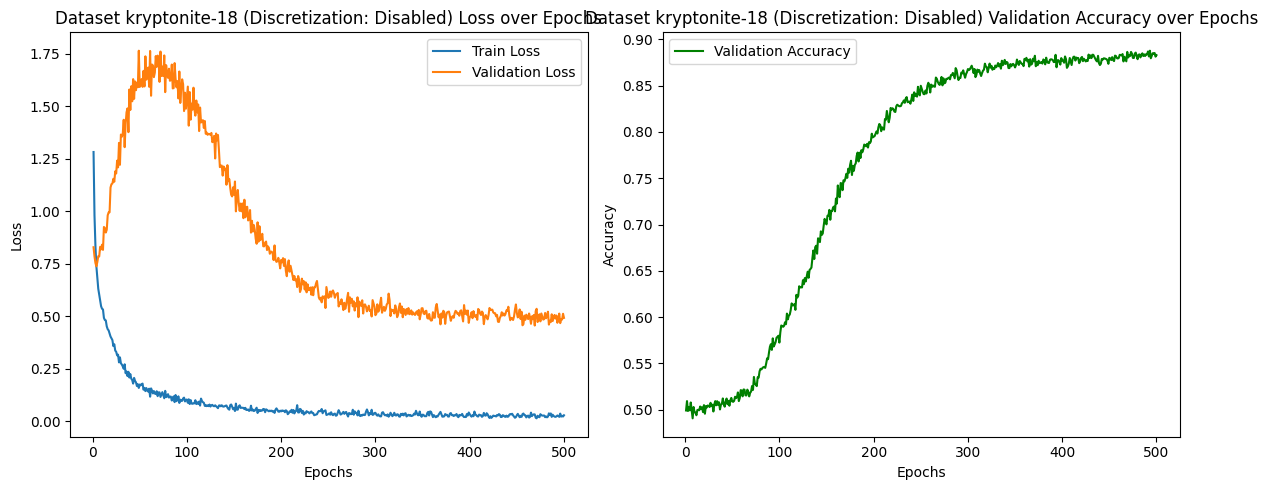

[codecarbon INFO @ 10:31:21] Energy consumed for RAM : 0.001729 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 10:31:21] Energy consumed for all GPUs : 0.003246 kWh. Total GPU Power : 58.714652929503764 W
[codecarbon INFO @ 10:31:21] Energy consumed for all CPUs : 0.002348 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:31:21] 0.007323 kWh of electricity used since the beginning.


Emissions tracking completed and data saved.


In [1]:

# !pip install codecarbon

# 2. Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from torch.utils.data import DataLoader, TensorDataset
import os

# Import CodeCarbon's EmissionsTracker
from codecarbon import EmissionsTracker

# 3. Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 4. Define Xavier initialization function
def init_weights_xavier(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)  # Initialize biases to zero for consistency

# 5. Define a single ResNet Block with Batch Normalization and Dropout
class ResNetBlock(nn.Module):
    def __init__(self, size):
        super(ResNetBlock, self).__init__()
        self.fc1 = nn.Linear(size, size)
        self.bn1 = nn.BatchNorm1d(size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(size, size)
        self.bn2 = nn.BatchNorm1d(size)

    def forward(self, x):
        residual = x
        out = self.relu(self.bn1(self.fc1(x)))
        out = self.bn2(self.fc2(out))
        out += residual
        out = self.relu(out)
        return out

# 6. Define the complete ResNet architecture with deeper layers and doubled size
class DeepResNet(nn.Module):
    def __init__(self, input_size):
        super(DeepResNet, self).__init__()
        self.fc_initial = nn.Linear(input_size, 512)
        self.block1 = ResNetBlock(512)
        self.block2 = ResNetBlock(512)
        self.block3 = ResNetBlock(512)  # Additional ResNet block
        self.block4 = ResNetBlock(512)  # Additional ResNet block
        self.fc_final = nn.Linear(512, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Dropout with 50% rate for the final layer

    def forward(self, x):
        x = self.relu(self.fc_initial(x))
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.dropout(x)
        x = torch.sigmoid(self.fc_final(x))
        return x

# 7. Discretize features function
def discretize_data(X, strategy='uniform', n_bins=10):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    X_discretized = discretizer.fit_transform(X)
    return X_discretized

# 8. Load and preprocess the data with optional discretization
def load_data(n, discretize=False, n_bins=10, strategy='uniform'):
    base_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/'
    X = np.load(os.path.join(base_path, f'kryptonite-{n}-X.npy'))
    y = np.load(os.path.join(base_path, f'kryptonite-{n}-y.npy'))

    # If n=24, attempt to load additional data
    if n == 24:
        additional_X_path = os.path.join(base_path, f'additional-kryptonite-{n}-X.npy')
        additional_y_path = os.path.join(base_path, f'additional-kryptonite-{n}-y.npy')
        if os.path.exists(additional_X_path) and os.path.exists(additional_y_path):
            additional_X = np.load(additional_X_path)
            additional_y = np.load(additional_y_path)
            X = np.vstack((X, additional_X))
            y = np.concatenate((y, additional_y))
            print(f"Loaded additional data for n={n}: {additional_X.shape[0]} samples")
        else:
            print(f"No additional data found for n={n}. Proceeding with original dataset.")

    # Split into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Optionally discretize the data
    if discretize:
        X_train = discretize_data(X_train, strategy=strategy, n_bins=n_bins)
        X_val = discretize_data(X_val, strategy=strategy, n_bins=n_bins)
        X_test = discretize_data(X_test, strategy=strategy, n_bins=n_bins)

    return X_train, X_val, X_test, y_train, y_val, y_test

# 9. Set batch size
batch_size = 256  # Adjust as needed

# 10. Train the DeepResNet model with mini-batch gradient descent and early stopping
def train_model(X_train, y_train, X_val, y_val, input_size, num_epochs=500, learning_rate=0.001, patience=10):
    # Convert data to PyTorch tensors and create DataLoader for mini-batches
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)

    # Initialize model, apply Xavier initialization, loss function, and optimizer
    model = DeepResNet(input_size).to(device)
    model.apply(init_weights_xavier)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

    # Track losses and accuracies for plotting
    train_losses = []
    val_losses = []
    val_accuracies = []
    best_val_loss = float('inf')
    patience_counter = 0

    # Training loop with early stopping
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0  # To accumulate the training loss over all batches

        # Loop over mini-batches
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            train_loss = criterion(output, y_batch)
            train_loss.backward()
            optimizer.step()
            epoch_train_loss += train_loss.item()  # Accumulate training loss

        # Average training loss over all batches for the epoch
        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation loss and accuracy
        model.eval()
        with torch.no_grad():
            val_output = model(X_val_tensor)
            val_loss = criterion(val_output, y_val_tensor)
            val_pred = (val_output > 0.5).float()
            val_accuracy = accuracy_score(y_val_tensor.cpu().numpy(), val_pred.cpu().numpy())

            # Record validation loss and accuracy
            val_losses.append(val_loss.item())
            val_accuracies.append(val_accuracy)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, '
                  f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')

    return model, train_losses, val_losses, val_accuracies

# 11. Evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)
    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_pred = (test_output > 0.5).float()
        test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    return test_accuracy

# 12. Plot losses and accuracies
def plot_metrics(train_losses, val_losses, val_accuracies, dataset_name):
    epochs_train = range(1, len(train_losses) + 1)
    epochs_val = range(1, len(val_losses) + 1)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot training and validation losses
    ax1.plot(epochs_train, train_losses, label="Train Loss")
    ax1.plot(epochs_val, val_losses, label="Validation Loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.set_title(f"{dataset_name} Loss over Epochs")
    ax1.legend()

    # Plot validation accuracy
    epochs_val_acc = range(1, len(val_accuracies) + 1)
    ax2.plot(epochs_val_acc, val_accuracies, label="Validation Accuracy", color='green')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title(f"{dataset_name} Validation Accuracy over Epochs")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 13. Main script with EmissionsTracker integrated
def main():
    # Define the output directory for CodeCarbon logs
    output_dir = "./carbon_tracker_logs"

    # Create the directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    print(f"Directory '{output_dir}' is ready for CodeCarbon logs.")

    # Initialize and start the EmissionsTracker using a context manager
    with EmissionsTracker(
        project_name="DeepResNet-Training",
        output_dir=output_dir,
        measure_power_secs=60  # Optional: Adjust measurement frequency
    ) as tracker:
        possible_n_vals = [18]  # Adjust based on dataset availability

        for n in possible_n_vals:
            print(f"\nDataset kryptonite-{n}")

            # Test performance with and without discretization
            for discretize in [False]:
                print(f"\nDiscretization: {'Enabled' if discretize else 'Disabled'}")
                X_train, X_val, X_test, y_train, y_val, y_test = load_data(
                    n,
                    discretize=discretize,
                    n_bins=10,
                    strategy='quantile' if discretize else 'uniform'
                )
                input_size = X_train.shape[1]

                # Train and evaluate the model
                model, train_losses, val_losses, val_accuracies = train_model(
                    X_train, y_train, X_val, y_val, input_size
                )
                test_accuracy = evaluate_model(model, X_test, y_test)

                # Plot metrics
                plot_metrics(
                    train_losses,
                    val_losses,
                    val_accuracies,
                    f"Dataset kryptonite-{n} (Discretization: {'Enabled' if discretize else 'Disabled'})"
                )

    # After exiting the 'with' block, the tracker stops automatically
    print("Emissions tracking completed and data saved.")

# Execute the main script
if __name__ == "__main__":
    main()

[codecarbon INFO @ 10:20:25] [setup] RAM Tracking...
[codecarbon INFO @ 10:20:25] [setup] GPU Tracking...
[codecarbon INFO @ 10:20:25] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 10:20:25] [setup] CPU Tracking...
[codecarbon WARNING @ 10:20:25] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU



Using device: cuda
Directory './carbon_tracker_logs' is ready for CodeCarbon logs.


[codecarbon WARNING @ 10:20:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 10:20:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:20:26] >>> Tracker's metadata:
[codecarbon INFO @ 10:20:26]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 10:20:26]   Python version: 3.10.12
[codecarbon INFO @ 10:20:26]   CodeCarbon version: 2.7.4
[codecarbon INFO @ 10:20:26]   Available RAM : 83.477 GB
[codecarbon INFO @ 10:20:26]   CPU count: 12
[codecarbon INFO @ 10:20:26]   CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 10:20:26]   GPU count: 1
[codecarbon INFO @ 10:20:26]   GPU model: 1 x NVIDIA A100-SXM4-40GB
[codecarbon INFO @ 10:20:27] Saving emissions data to file /content/carbon_tracker_logs/emissions.csv



Dataset kryptonite-24

Discretization: Disabled
Loaded additional data for n=24: 250000 samples
Epoch [1/80], Train Loss: 0.9598, Val Loss: 0.6997, Val Accuracy: 0.5016
Epoch [10/80], Train Loss: 0.6897, Val Loss: 0.6951, Val Accuracy: 0.4995
Epoch [20/80], Train Loss: 0.6906, Val Loss: 0.6955, Val Accuracy: 0.4982
Epoch [30/80], Train Loss: 0.5260, Val Loss: 0.5147, Val Accuracy: 0.7667


[codecarbon INFO @ 10:21:27] Energy consumed for RAM : 0.000522 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 10:21:27] Energy consumed for all GPUs : 0.001061 kWh. Total GPU Power : 63.635299436087685 W
[codecarbon INFO @ 10:21:27] Energy consumed for all CPUs : 0.000708 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:21:27] 0.002291 kWh of electricity used since the beginning.


Epoch [40/80], Train Loss: 0.3024, Val Loss: 0.3038, Val Accuracy: 0.8713
Epoch [50/80], Train Loss: 0.1845, Val Loss: 0.1867, Val Accuracy: 0.9420
Epoch [60/80], Train Loss: 0.1555, Val Loss: 0.1668, Val Accuracy: 0.9520


[codecarbon INFO @ 10:22:27] Energy consumed for RAM : 0.001043 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 10:22:27] Energy consumed for all GPUs : 0.002102 kWh. Total GPU Power : 62.45909895390086 W
[codecarbon INFO @ 10:22:27] Energy consumed for all CPUs : 0.001417 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:22:27] 0.004562 kWh of electricity used since the beginning.


Epoch [70/80], Train Loss: 0.1490, Val Loss: 0.1665, Val Accuracy: 0.9531
Epoch [80/80], Train Loss: 0.1399, Val Loss: 0.1699, Val Accuracy: 0.9517
Test Accuracy: 0.9522


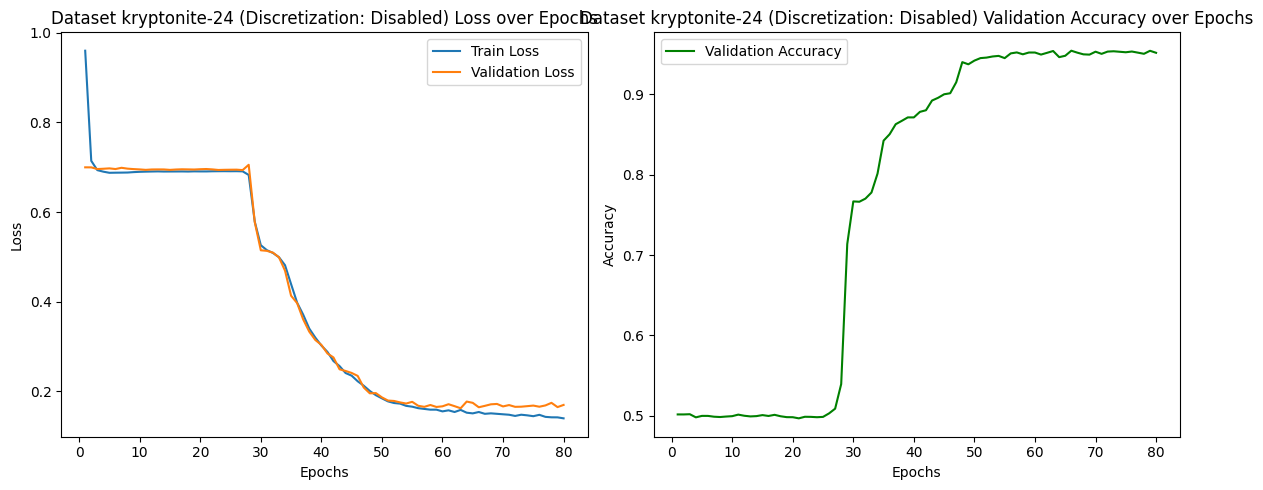

[codecarbon INFO @ 10:22:45] Energy consumed for RAM : 0.001199 kWh. RAM Power : 31.30389261245728 W
[codecarbon INFO @ 10:22:45] Energy consumed for all GPUs : 0.002412 kWh. Total GPU Power : 62.29680469588447 W
[codecarbon INFO @ 10:22:45] Energy consumed for all CPUs : 0.001628 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 10:22:45] 0.005239 kWh of electricity used since the beginning.


Emissions tracking completed and data saved.


In [1]:

# !pip install codecarbon

# 2. Import necessary libraries
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer
from torch.utils.data import DataLoader, TensorDataset
import os

# Import CodeCarbon's EmissionsTracker
from codecarbon import EmissionsTracker

# 3. Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 4. Define Xavier initialization function
def init_weights_xavier(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            nn.init.zeros_(m.bias)  # Initialize biases to zero for consistency

# 5. Define a single ResNet Block with Batch Normalization and Dropout
class ResNetBlock(nn.Module):
    def __init__(self, size):
        super(ResNetBlock, self).__init__()
        self.fc1 = nn.Linear(size, size)
        self.bn1 = nn.BatchNorm1d(size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(size, size)
        self.bn2 = nn.BatchNorm1d(size)

    def forward(self, x):
        residual = x
        out = self.relu(self.bn1(self.fc1(x)))
        out = self.bn2(self.fc2(out))
        out += residual
        out = self.relu(out)
        return out

# 6. Define the complete ResNet architecture with deeper layers and doubled size
class DeepResNet(nn.Module):
    def __init__(self, input_size):
        super(DeepResNet, self).__init__()
        self.fc_initial = nn.Linear(input_size, 512)
        self.block1 = ResNetBlock(512)
        self.block2 = ResNetBlock(512)
        self.block3 = ResNetBlock(512)  # Additional ResNet block
        self.block4 = ResNetBlock(512)  # Additional ResNet block
        self.fc_final = nn.Linear(512, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Dropout with 50% rate for the final layer

    def forward(self, x):
        x = self.relu(self.fc_initial(x))
        x = self.block1(x)
        x = self.block2(x)
        x = self.block3(x)
        x = self.block4(x)
        x = self.dropout(x)
        x = torch.sigmoid(self.fc_final(x))
        return x

# 7. Discretize features function
def discretize_data(X, strategy='uniform', n_bins=10):
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy=strategy)
    X_discretized = discretizer.fit_transform(X)
    return X_discretized

# 8. Load and preprocess the data with optional discretization
def load_data(n, discretize=False, n_bins=10, strategy='uniform'):
    base_path = '/content/drive/MyDrive/Kryptonite-N/Datasets/'
    X = np.load(os.path.join(base_path, f'kryptonite-{n}-X.npy'))
    y = np.load(os.path.join(base_path, f'kryptonite-{n}-y.npy'))

    # If n=24, attempt to load additional data
    if n == 24:
        additional_X_path = os.path.join(base_path, f'additional-kryptonite-{n}-X.npy')
        additional_y_path = os.path.join(base_path, f'additional-kryptonite-{n}-y.npy')
        if os.path.exists(additional_X_path) and os.path.exists(additional_y_path):
            additional_X = np.load(additional_X_path)
            additional_y = np.load(additional_y_path)
            X = np.vstack((X, additional_X))
            y = np.concatenate((y, additional_y))
            print(f"Loaded additional data for n={n}: {additional_X.shape[0]} samples")
        else:
            print(f"No additional data found for n={n}. Proceeding with original dataset.")

    # Split into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

    # Standardize the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)

    # Optionally discretize the data
    if discretize:
        X_train = discretize_data(X_train, strategy=strategy, n_bins=n_bins)
        X_val = discretize_data(X_val, strategy=strategy, n_bins=n_bins)
        X_test = discretize_data(X_test, strategy=strategy, n_bins=n_bins)

    return X_train, X_val, X_test, y_train, y_val, y_test

# 9. Set batch size
batch_size = 1024  # Adjust as needed

# 10. Train the DeepResNet model with mini-batch gradient descent and early stopping
def train_model(X_train, y_train, X_val, y_val, input_size, num_epochs=80, learning_rate=0.001, patience=10):
    # Convert data to PyTorch tensors and create DataLoader for mini-batches
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1).to(device)

    # Initialize model, apply Xavier initialization, loss function, and optimizer
    model = DeepResNet(input_size).to(device)
    model.apply(init_weights_xavier)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.001)

    # Track losses and accuracies for plotting
    train_losses = []
    val_losses = []
    val_accuracies = []
    best_val_loss = float('inf')
    patience_counter = 0

    # Training loop with early stopping
    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0  # To accumulate the training loss over all batches

        # Loop over mini-batches
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            output = model(X_batch)
            train_loss = criterion(output, y_batch)
            train_loss.backward()
            optimizer.step()
            epoch_train_loss += train_loss.item()  # Accumulate training loss

        # Average training loss over all batches for the epoch
        train_losses.append(epoch_train_loss / len(train_loader))

        # Validation loss and accuracy
        model.eval()
        with torch.no_grad():
            val_output = model(X_val_tensor)
            val_loss = criterion(val_output, y_val_tensor)
            val_pred = (val_output > 0.5).float()
            val_accuracy = accuracy_score(y_val_tensor.cpu().numpy(), val_pred.cpu().numpy())

            # Record validation loss and accuracy
            val_losses.append(val_loss.item())
            val_accuracies.append(val_accuracy)

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0 or epoch == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, '
                  f'Val Loss: {val_loss.item():.4f}, Val Accuracy: {val_accuracy:.4f}')

    return model, train_losses, val_losses, val_accuracies

# 11. Evaluate the model on the test set
def evaluate_model(model, X_test, y_test):
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)
    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_pred = (test_output > 0.5).float()
        test_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), test_pred.cpu().numpy())
    print(f'Test Accuracy: {test_accuracy:.4f}')
    return test_accuracy

# 12. Plot losses and accuracies
def plot_metrics(train_losses, val_losses, val_accuracies, dataset_name):
    epochs_train = range(1, len(train_losses) + 1)
    epochs_val = range(1, len(val_losses) + 1)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot training and validation losses
    ax1.plot(epochs_train, train_losses, label="Train Loss")
    ax1.plot(epochs_val, val_losses, label="Validation Loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.set_title(f"{dataset_name} Loss over Epochs")
    ax1.legend()

    # Plot validation accuracy
    epochs_val_acc = range(1, len(val_accuracies) + 1)
    ax2.plot(epochs_val_acc, val_accuracies, label="Validation Accuracy", color='green')
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    ax2.set_title(f"{dataset_name} Validation Accuracy over Epochs")
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 13. Main script with EmissionsTracker integrated
def main():
    # Define the output directory for CodeCarbon logs
    output_dir = "./carbon_tracker_logs"

    # Create the directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)
    print(f"Directory '{output_dir}' is ready for CodeCarbon logs.")

    # Initialize and start the EmissionsTracker using a context manager
    with EmissionsTracker(
        project_name="DeepResNet-Training",
        output_dir=output_dir,
        measure_power_secs=60  # Optional: Adjust measurement frequency
    ) as tracker:
        possible_n_vals = [24]  # Adjust based on dataset availability

        for n in possible_n_vals:
            print(f"\nDataset kryptonite-{n}")

            # Test performance with and without discretization
            for discretize in [False]:
                print(f"\nDiscretization: {'Enabled' if discretize else 'Disabled'}")
                X_train, X_val, X_test, y_train, y_val, y_test = load_data(
                    n,
                    discretize=discretize,
                    n_bins=10,
                    strategy='quantile' if discretize else 'uniform'
                )
                input_size = X_train.shape[1]

                # Train and evaluate the model
                model, train_losses, val_losses, val_accuracies = train_model(
                    X_train, y_train, X_val, y_val, input_size
                )
                test_accuracy = evaluate_model(model, X_test, y_test)

                # Plot metrics
                plot_metrics(
                    train_losses,
                    val_losses,
                    val_accuracies,
                    f"Dataset kryptonite-{n} (Discretization: {'Enabled' if discretize else 'Disabled'})"
                )

    # After exiting the 'with' block, the tracker stops automatically
    print("Emissions tracking completed and data saved.")

# Execute the main script
if __name__ == "__main__":
    main()
